# Zmiany w zakresie mobilności podczas pandemii COVID-19 w Polsce
Autorzy: \

Artur Żółkowski\
Szymon Szmajdziński\
Krystian Wrotniak

## Mobilność

Przez "mobilność" rozumiemy zdolność do (raczej swobodnego) przemieszczania się. Pod kątem COVID-19 będziemy badać zmiany w zakresie mobilności w sensie *Jak nasza mobilność była ograniczana na przestrzeni kolejnych okresów przebiegu pandemii?*

## Analiza - ramki danych

Aby więc zbadać zmiany w zakresie mobilnośći musieliśmy znaleźć oraz przekształcić odpowiendnie ramki danych tak, aby w skondensowany sposób dostarczały nam użytecznych informacjii

Zaczęliśmy od pobrania z Google Community Mobility Reports raportu na temat mobilnośći w Polsce podczas rozwoju pandemii. 

In [ ]:
#@title Ramki danych 
import pandas as pd
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1IXjdnNy-jjxh65drrjuNXRqKMJyeNXhe/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
dfs = pd.read_csv(csv_raw)
print(dfs.head())

  country_region_code  ... residential_percent_change_from_baseline
0                  PL  ...                                     -1.0
1                  PL  ...                                      0.0
2                  PL  ...                                      0.0
3                  PL  ...                                      1.0
4                  PL  ...                                      0.0

[5 rows x 14 columns]


In [ ]:
#@title 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#@title Ramka danych 
dfs.tail(100000).head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
6423,PL,Poland,Greater Poland Voivodeship,PiÅa County,NaN,NaN,NaN,2020-05-25,-14.0,-4.0,NaN,-27.0,-7.0,7.0
6424,PL,Poland,Greater Poland Voivodeship,PiÅa County,NaN,NaN,NaN,2020-05-26,-16.0,0.0,NaN,-15.0,-21.0,6.0
6425,PL,Poland,Greater Poland Voivodeship,PiÅa County,NaN,NaN,NaN,2020-05-27,-17.0,-8.0,NaN,-17.0,-24.0,7.0
6426,PL,Poland,Greater Poland Voivodeship,PiÅa County,NaN,NaN,NaN,2020-05-28,-17.0,-8.0,NaN,-29.0,-23.0,9.0
6427,PL,Poland,Greater Poland Voivodeship,PiÅa County,NaN,NaN,NaN,2020-05-29,-19.0,-6.0,NaN,-20.0,-21.0,8.0


Ramka danych dostarcza informacjii na temat wzrostu bądź spadku wskaźnika mobilności- jak dużo ludzi poruszało się w danym miejscu- w odniesieniu do "bazy". Dane przedstawione są począwszy od 16 lutego 2020.

"Baza" jest to mediana z wartości z 5 tygodnii między 3 stycznia 2020 a 6 lutego 2020 - dla odpowiednich dni tygodnia. Oznacza to, że linia bazowa dla piątków to mediana z wartośći uzyskiwanych w piątki we wskazanym wyżej okresie.

Wspomniane wzrosty i spadki wyznaczane są w obrębie 6 wytyczonych kategorii:

- Recreation (kluby, teatry, kina, restauracje itd)
- Groceries and Pharmacies
- Parks (parki miejskie, narodowe, słowem- tereny zielone)
- Transit Stations (metro, porty, dworce itp)
- Workspaces
- Residential Areas (wszelkie miejsca uznawane za teren prywatny danej osoby)

Następnie zdecydowaliśmy się na wprowadzenie rozróżnienia na dane "Sprzed Lockdown'u" ("Pre-Lockdown") oraz "Podczas Lockdown'u" ("During Lockdown"). Posegregowaliśmy więc dane na te sprzed 10 marca 2020 oraz na te po tej dacie.

In [ ]:
#@title
dfs= dfs.rename(columns={"sub_region_1":"Voivodeship","retail_and_recreation_percent_change_from_baseline":"Recreation","grocery_and_pharmacy_percent_change_from_baseline":"Grocery_and_Pharmacy","parks_percent_change_from_baseline":"Parks","transit_stations_percent_change_from_baseline":"Transit_stations",	"workplaces_percent_change_from_baseline":"Workplaces",	"residential_percent_change_from_baseline":"Residential"})

In [ ]:
#@title 
dfs=dfs[["country_region","Voivodeship","date","Recreation","Grocery_and_Pharmacy","Parks","Transit_stations","Workplaces","Residential"]]

In [ ]:
#@title
def dateconv(date):
  q ="2020-03-10"
  if date < q:
    return "Pre-Lockdown"
  else:
    return "During-Lockdown"
  
dfs["Lockdown"] = dfs["date"].apply(dateconv)

In [ ]:
#@title
dfs = dfs[(dfs["Recreation"]<=100) & (dfs["Recreation"]>=-100) & 
          (dfs["Grocery_and_Pharmacy"]<=100) & (dfs["Grocery_and_Pharmacy"]>=-100) & 
          (dfs["Parks"]<=100) & (dfs["Parks"]>=-100) & 
          (dfs["Transit_stations"]<=100) & (dfs["Transit_stations"]>=-100) & 
          (dfs["Workplaces"]<=100) & (dfs["Workplaces"]>=-100) & 
          (dfs["Residential"]<=100) & (dfs["Residential"]>=-100)]

In [ ]:
#@title
dfs_mz_sl = dfs[(dfs["Voivodeship"] == "Masovian Voivodeship") | (dfs["Voivodeship"] == "Silesian Voivodeship")]


In [ ]:
#@title Ramka po drobnych modyfikacjach
dfs.head()

,country_region,Voivodeship,date,Recreation,Grocery_and_Pharmacy,Parks,Transit_stations,Workplaces,Residential,Lockdown
0,Poland,NaN,2020-02-15,7.0,-1.0,26.0,4.0,0.0,-1.0,Pre-Lockdown
1,Poland,NaN,2020-02-16,12.0,-13.0,18.0,6.0,-2.0,0.0,Pre-Lockdown
2,Poland,NaN,2020-02-17,6.0,1.0,20.0,1.0,1.0,0.0,Pre-Lockdown
3,Poland,NaN,2020-02-18,3.0,-1.0,13.0,-1.0,1.0,1.0,Pre-Lockdown
4,Poland,NaN,2020-02-19,5.0,0.0,13.0,-1.0,1.0,0.0,Pre-Lockdown


Po kosmetycznych poprawkach takich jak zmiany nazw kolumn rozpoczęliśmy wizualizację zależności pomiędzy zdobytymi danymi.

## Analiza - wykresy

### Wykresy skrzypcowe

Poniższe wykresy prezentują jak bardzo zmieniła się czestotliwość z jaką ludzie chodzili w dane miejsca. Na wykresach widać wyraźne różnice dla danych przed i po lockdownie. Wykresy te przedstawiają sytuację la dwóch województw: Mazowieckiego i Śląskiego. Na wykresach możemy zaobserwować spadek zainteresowania miejscami przeznaczonymi dla rozrywki, oraz miejscami pracy. Widać również, że ludzie dużo więcej czasu spędzają w domach. Ciekawym wykresem jest wykres dotyczący parków. Na tym wykresie widać, że skrzypce zrobiły się szersze i służsze po lockdownie. Może to oznaczać, że były dni w których ludzie nie ruszali się z domu i nie wychodzili nawet do parków. Widać też że wykres jest też szeroki powyżej poziomu bazy. Są to zapewne dni, gdzie nie było obostrzeń związanymi z chodzeniem do parków, a ludzie zmęczeni siedzeniem w damach poszli spacerować. 

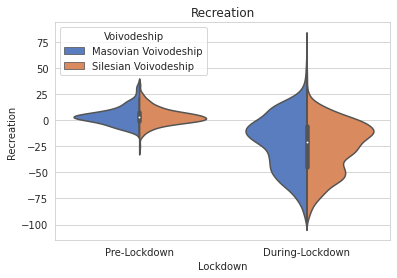

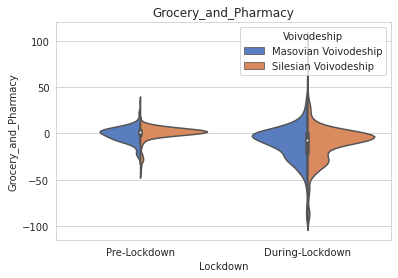

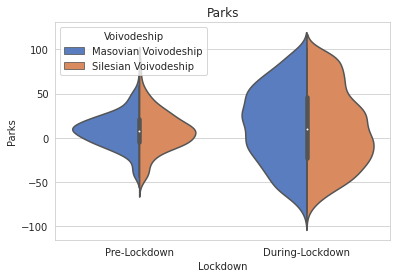

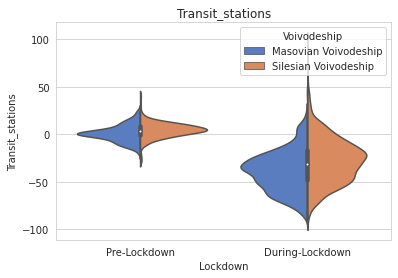

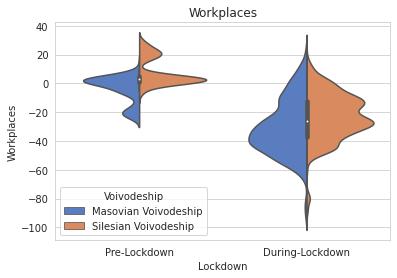

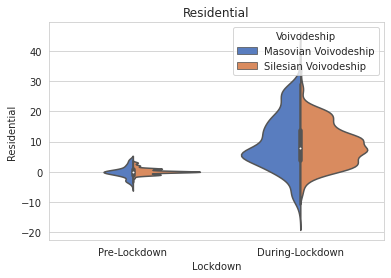

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title
sns.set_style("whitegrid")
columns = ["Recreation",	"Grocery_and_Pharmacy",	"Parks",	"Transit_stations",	 "Workplaces", 	"Residential"]
for i in columns:
  ax = sns.violinplot(x="Lockdown", y=i, hue="Voivodeship", data=dfs_mz_sl, palette="muted", split=True)
  ax.set_title(i)
  plt.figure()

### Boxploty

Poniższe wykresy sugerują wyraźne spadki w uczęszczania do restauracji, klubów itp, w użytkowaniu komunikacji publicznej jak również w meldowaniu się w miejscu pracy. Natomiast można zaobserwować wzrost liczby osób przebywających głównie wo domu.

Jeśli zaś chodzi o różnice pamiędzy Mazowszem a Śląskiem, za istotne moża uznać te w użykowaniu transportu publicznego (w trakcie pandemii bardziej korzystają z niego Ślązacy) oraz w przebywaniu w miejscu pracy - Mazowszanie pracują częsciej zdalnie niż Ślązacy.

**Obserwując poniższe wykresy warto wziąć pod uwagę fakt, iż w kategorię "During Lockdown" wpisuje się również okres poluzowań obostrzeń, a więc okres późniejszej wiosny i wakacji. Ma to zapewne spory wpływ m.in. na wyniki związane z użytkowaniem parków.** Wyraźniejszy wgląd na tę kwestię zapewnią późniejsze wykresy.  



In [ ]:
#@title

columns = ["Recreation",	"Grocery_and_Pharmacy",	"Parks",	"Transit_stations",	 "Workplaces", 	"Residential"]
for i in columns:
  fig = px.box(dfs_mz_sl, x="Lockdown", y=i, color="Voivodeship",width=600,height=400,title=i,template="plotly_white")# or "inclusive", or "linear" by default

  fig.show()

### Wykresy słupkowe

Poniższe barploty obrazują ogólne wzrosty bądź spadki mobilności w określonych kategoriach, porównując wyniki z Mazowsza, Śląska oraz Polski ogólnie. Oprócz mniej lub bardziej wyraźnych spadków dla wszystkich kategorii oprócz Parks oraz Residential, szczególnie dla Mazowsza widać odwrócenie się od transportu miejskiego.

Jeśi zaś chodzi o wzrosty, takowy w przypadku pobytu w domu zdaje się być jasny- dobrze wiedzieć, że obywatele mniej lub bardziej zastosowali się do zalecenia siedzienia w domu (choć możnaby liczyć na wiekszy odzew w tej kwestii).

Natomiast sytuację, w której obserwujemy wzrost zainteresowania parkami i ogrodami możnaby tłumaczyć wiekszą ilością czasu wolnego dla wielu osób, połączoną z coraz wiekszą frustracją siedzeniem w domu. Parki przez wiekszość, lasy i ogrody przez wiekszą część pandemii w Polsce nie były zamknięte, mogły więc stanowić atrakcyjną alternatywę dla klaustrofobicznych czterech ścian.

In [ ]:
#@title
averages_mz= dfs_mz_sl[dfs_mz_sl["Voivodeship"]=="Masovian Voivodeship"].mean()
averages_sl = dfs_mz_sl[dfs_mz_sl["Voivodeship"]=="Silesian Voivodeship"].mean()
averages_pl = dfs.mean()

In [ ]:
#@title
fig = go.Figure()
fig.add_trace(go.Bar(
    x=columns,
    y=averages_mz,
    name="Mazowieckie",
    marker_color='steelblue'
))
fig.add_trace(go.Bar(
    x=columns,
    y=averages_sl,
    name='Śląskie',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=columns,
    y=averages_pl,
    name='Polska',
    marker_color='limegreen'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

### Wykresy liniowe

Poniższe wykresy prezentują w wymiarze czasowym zmiany w zakresie mobilności kolejno:
- W Polsce ogółem
- W województwie mazowieckim
- W województwie Wielkopolskim

Każdy pokazuje jednak zbliżony przebieg trendów dla poszczególnych kategorii. Na wykresach zaznaczony jest konkretny moment wprowadzenia Lockdownu w Polsce. Od tej chwili widać drastyczny spadek mobilności we wszystkich rejonach oprócz domostwa (gdzie obecność owszem wzrosła, lecz nie tak gwałtownie w porównaniu do spadków w innych miejscach).

Da się zaobserwować również okres luzowania obostrzeń na wysokości maja-lipca, aby warości ponownie zaczęły spadać wraz z nadejściem drugiej fali pandemii w połowie października. (Ciekawym aspektem społeczno-psychologicznym jest jednak fakt, że mimo wyraźnie gorszej sytuacji epidemicznej, odzew ze strony społeczeństwa zdaje się być mniejszy lub bardziej "leniwy" niż w marcu)

Wykesy pokazują również wyraźnie różne trendy w zainteresowaniach parkami.Tak jak obecność obywateli na terenach zielonych naturalnie gwałtownie spadła wraz z ogłoszeniem Lockdown'u, tak również (jeszcze gwałtowniej) wzrosła, gdy zostały poluzowane zakazy dotyczące użytkowania tych terenów. Bardzo wysokie zainteresowanie utrzymywało się przez cały okres wakacyjny, aż do nadejścia drugiej fali (choć na spadek w tym okresie złożył się również zapewne czynnik pogodowy).

In [ ]:
#@title
import datetime
dfs_mz_sl["date"] =pd.to_datetime(dfs_mz_sl["date"]) 
dfs_mz_sl.set_index("date",inplace=True)

dfs["date"] =pd.to_datetime(dfs["date"]) 
dfs.set_index("date",inplace=True)

In [ ]:
#@title 
df_mz = dfs_mz_sl[dfs_mz_sl["Voivodeship"] == "Masovian Voivodeship"].resample('W').agg("mean")
df_sl = dfs_mz_sl[dfs_mz_sl["Voivodeship"] == "Silesian Voivodeship"].resample('W').agg("mean")
df_pl = dfs.resample('W').agg("mean")

In [ ]:
#@title
mindate = df_pl.index.min()
maxdate = df_pl.index.max()
lockdown1 = '2020-03-10 00:00:00'
lockdown1

'2020-03-10 00:00:00'

In [ ]:
#@title
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1],
    y=[44],
    text=["Lockdown"],
    mode="text",
))

l = df_pl.columns
colors = ['maroon',"red",'forestgreen','sandybrown','darkorchid','navy']
for i in range(len(l)):
  fig.add_trace(go.Scatter(x=df_pl.index, y=df_pl[l[i]],
                    mode='lines+markers',
                    name=l[i],
                     marker_color=colors[i],
                     ))
  fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="plotly_white")
  fig.update_layout(
    title= "Mobility Trends in Poland",
    width=1400,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=42,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()

In [ ]:
#@title
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1],
    y=[44],
    text=["Lockdown"],
    mode="text",
))

l = df_mz.columns
colors = ['maroon',"red",'forestgreen','sandybrown','darkorchid','navy']
for i in range(len(l)):
  fig.add_trace(go.Scatter(x=df_zachp.index, y=df_mz[l[i]],
                    mode='lines+markers',
                    name=l[i],
                     marker_color=colors[i],
                     ))
  fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="plotly_white")
  fig.update_layout(
    title= "Mobility Trends in Mazowieckie",
    width=1400,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=42,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()

In [ ]:
#@title
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1],
    y=[39,39,39,39,39,39],
    text=["Lockdown"],
    mode="text",
))

l = df_wp.columns
colors = ['maroon',"red",'forestgreen','sandybrown','darkorchid','navy']
for i in range(len(l)):
  fig.add_trace(go.Scatter(x=df_wp.index, y=df_wp[l[i]],
                    mode='lines+markers',
                    name=l[i],
                     marker_color=colors[i],
                     ))
  fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="plotly_white")
  fig.update_layout(
    title= "Mobility Trends in Wielkopolskie",
    width=1400,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()

### Kwestia pracy- zdalnej i stacjonarnej

Poniższy wykres pokazuje, jak ogólnie w Polsce spadł odsetek osób uczęszczających do pracy stacjonarnie. Spodziewanym jest spadek na wysokości ogłoszenia Lockdown'u, jednak widać również ich część firm nadal preferowało politykę pracy zdalniej lub w trybie hybrydowym nawet w okresie optymizmu, to jest- podczas lata.

Tworzą się ogólnie podstawy by zakładać, iż tegoroczna (przymusowa) weryfikacja wydajności trybu pracy zdalnej bądź hybrydowej przyczyni się do zmiany nastawienia firm na to rozwiązanie, to znaczy- będą bardziej skłonne implementować różne wariacje tych trybów na dłuższą metę.

In [ ]:
#@title
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1],
    y=[26,39,39,39,39,39],
    text=["Lockdown 1"],
    mode="text",
))
fig.add_trace(go.Scatter(x=df_mz.index, y=df_mz["Workplaces"],
                    mode='lines+markers',
                    name="Mazowieckie",
                    ))
fig.add_trace(go.Scatter(x=df_sl.index, y=df_sl["Workplaces"],
                    mode='lines+markers',
                    name="Śląskie",
                    ))
fig.add_trace(go.Scatter(x=df_pl.index, y=df_pl["Workplaces"],
                    mode='lines+markers',
                    name="Polska",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="plotly_white")
fig.update_layout(
    title= "Is work back to normal?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=25,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()

### Zachorowania

Oprócz tego po krótce zbadaliśmy jak zmieniały się trendy w wyszukiwarce Google bazując na danych z Google Trends. Wykresy są póki co w fazie wstępnej, gdyż nie wiadomo jescze czy wystarczy nam miejsca, aby umieścić je na plakacie. 

Wykresy obrazują sytuację z początku Coronawirusa. Przejęcie sytuacją było wtedy duże wśród społeczeństwa. Na tyle duże, że mimo niedużych przyrostów zachorowań (w porównaniu do obecnej sytuacji), zmiany w trendach były znaczące. Największe skoki i spadki odnotowane zostały właśnie w okresie na przełomie marca i kwietnia. Trendy te stopniowo się wyrównywały z czasem mimo tego, że ilość zachorowań rosła. Oznacza to zapenwne zakończenie się okresy początkowego szoku i przywyknięcie ludzi do bieżącej sytuacji.

Na poniższym wykresie widać, że zdecydowanie mniej ludzi szukało noclegów na bookingu, jest to oczeywiste. Mniej oczywiste jest natomiast duże zainteresowanie sklepami budowniczymi. Może to oznaczać, że ludzie przez to, że mają więcej wolnego czasu, oraz dłużej siedzą w domu zdecydowali się na mniejsze, bądź większe remonty. 

Przez długie siedzenie w domu niekktórym osobą zaczeła doskierać niestety samotność, ponieważ wzrosło zainteresowanie hodowlami psów. Odizolowane osoby szukają zapewne towarzysza.

In [33]:
#@title
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1fdjRzN7Pgv83C2h4iR6Osk3-2XFpOPs5/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Leroy = pd.read_csv(csv_raw, skiprows=2)
Leroy.columns = ["Data", "Zainteresowanie"]
Leroy['Data'] = pd.to_datetime(Leroy['Data'])

orig_url='https://drive.google.com/file/d/1HWcBDyDTbNzEnlPXZgUtd4bCCq_Ue58c/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Booking = pd.read_csv(csv_raw, skiprows=2)
Booking.columns = ["Data", "Zainteresowanie"]
Booking['Data'] = pd.to_datetime(Booking['Data'])

orig_url='https://drive.google.com/file/d/1F3Q6lDH2GReRGB1jvxzxPKS6rzWCxKwH/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Hodowla = pd.read_csv(csv_raw, skiprows=2)
Hodowla.columns = ["Data", "Zainteresowanie"]
Hodowla['Data'] = pd.to_datetime(Hodowla['Data'])

orig_url='https://drive.google.com/file/d/1eIPH18RVlZQ-UKsFUTlQXA5l87Q4VT5K/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
Zachorowania = pd.read_csv(csv_raw)
Zachorowania["Nowe przypadki"] = Zachorowania["Nowe przypadki"].apply(lambda x: x.replace("+", "")).apply(lambda x: int(x))

def toDate(x):
    x = str(x)
    data = ""
    if len(x)== 5:
      data = x[3] + x[4] + "/" + x[0] + x[1] + "/20"
    if len(x)== 4:
      if x[1] == ".":
        data = x[2] + x[3] + "/" + "0" + x[0] + "/20"
      else:
        data = x[3] + "0" + "/" + x[0] + x[1] +  "/20"
    if len(x)== 3:
      data =   x[2] + "0" + "/" + "0" + x[0] + "/20"
    return data

Zachorowania["Data"] = Zachorowania["Data"].apply(lambda x: toDate(x))
Zachorowania['Data'] = pd.to_datetime(Zachorowania['Data']) - pd.to_timedelta(7, unit='d')
df = Zachorowania.groupby([pd.Grouper(key='Data', freq='W-MON')])['Nowe przypadki'].sum().reset_index().sort_values('Data')
#print(Leroy.head(100), Leroy.info())

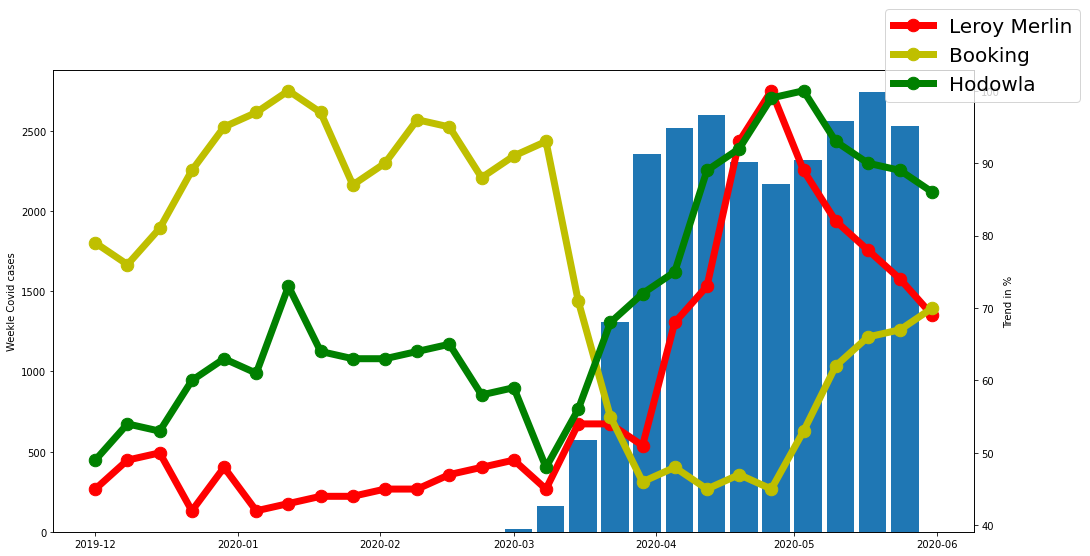

In [46]:
#@title
df2 = df[df["Data"] < "2020-06-1"]
df3 = Leroy[Leroy["Data"] < "2020-06-1"]
df4 = Booking[Booking['Data'] < "2020-06-1"]
df5 = Hodowla[Hodowla['Data'] < "2020-06-1"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(df2["Data"], df2["Nowe przypadki"], width = 6)
ax1.set_ylabel('Weekle Covid cases')

ax2 = ax1.twinx()
ax2.plot(df3["Data"], df3["Zainteresowanie"], 'r-', label = "Leroy Merlin", linewidth=7, marker = ".", markersize = 25)
ax2.plot(df4["Data"], df4["Zainteresowanie"], 'y-',  label = "Booking", linewidth=7, marker = ".", markersize = 25)
ax2.plot(df5["Data"], df5["Zainteresowanie"], 'g-',  label = "Hodowla", linewidth=7, marker = ".", markersize = 25)
ax2.set_ylabel('Trend in %')
fig.legend(prop={'size': 20})
fig.set_size_inches(16.5, 8.5)
#
plt.show()